# Drink By Data
### by Nima Sayyah

![nswine.png](nswine.png)


## Table of Contents
- [Introduction](#intro)
- [Exploratory Data Analysis](#eda)
- [Outcomes](#conclusions)

<a id='intro'></a>
## Introduction

For this project I implemented CRISP-DM Process over Wine Rating dataset extracted from Kaggle. The process consists of:
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

## Business Understanding

There are many varieties of wines in the market. It may sometimes turn into a dilemma if you are a wine lover but don't have expert knowledge that helps you selecting the best wine for the best value. I always stick to a random selection without reasonably justifying my choice but merely the value. I understand having a slightly more insight could help me picking a better choice. However, what could contribute into this difficult decision making is the situation for which we have to make a selection. Is the wine for a quiet night personal use? Is it for a party? Is it a present?. There are a few questions that can be asked attempting to resolve the dilemma.

- Where the best wines originate?
- Is there a correlation between the quality and price?
- Which certain wine varieties considered having a better quality?
- What is the best wine in each price range? 
- What words are most used when describing wine?

<a id='eda'></a>
## Exploratory Data Analysis

In [5]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
%matplotlib inline

In [6]:
# Reading the data
df = pd.read_csv("winemag-data-130k-v2.csv")

In [7]:
# Exploring the dataframe 
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### Data Observation

The data shows it contains 129971 rows and 14 columns: 

`df` columns:
 - **unnamed:** Index column that is uneeded
 - **country:** Countries where the wines produced
 - **description:** Description of the wines
 - **designation:** Plantations of grapevines from which wines are produced
 - **points:** Number of points scored for each wine 
 - **price:** The price of the bottle of wine
 - **province:** The province where the wines produced 
 - **region_1:** The region where the wines produced
 - **region_2:** More specific regions where the wines produced
 - **taster_name:** The name of the reviwer
 - **taster_twitter_handle:** The Twitter account of the reviewer
 - **title:** The name and year of the reviewed Wine 
 - **variety:** The type of grapes used to produce the wine
 - **winery:** The winery where the wines were produced

In [8]:
# Uderstanding the datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [9]:
# Checking for duplicate rows
df.duplicated().sum()

0

At this stage it is important to understand what columns are the least required to proceed our analysis with. These are the columns which will not add usefull information.

- **Unnamed** is an index column which can be removed. 
- **region_2** is redundant as region_1 will suffice.
- **taster_name** contains unimportant information.
- **taster_twitter_handle** contains unimportant information. 
- **designation** contains unimportant information.

It is also clear from the description that there are considrable null or missing values in certain columns:

- **country**
- **price**
- **province**
- **variety**
- **region_1**

In [10]:
# Making a copy to safely change the dataframe
df1 = df.copy()

In [11]:
# Dropping the unneeded columns
df1 = df1.drop(['Unnamed: 0','region_2', 'taster_name', 'taster_twitter_handle', 'designation'], axis=1)

In [12]:
# Exploring a glimps of the new dataframe
df1.head()

,country,description,points,price,province,region_1,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [13]:
# Generating descriptive statistic 
df1.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


The above descriptive analysis demonstrates the given range of scores given to the wines. These ratings are also used on various platforms by wine fans:

 - 98–100 – Classic
 - 94–97 – Superb
 - 90–93 – Excellent
 - 87–89 – Very good
 - 83–86 – Good
 - 80–82 – Acceptable
 
We can also draw the inference that the price of wines are in dollars based on www.winemag.com. Therefore the min and max scores of **80** and **100** are given to min price of **\\$4** and max of **\\$3300** respectively.

In [14]:
# Counting the number of reviews for each country
df1.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

Unsurprisingly, the most wine reviewes are from countries with high reputation in wine production: **USA**, **France**, **Italy**, **Spain** 

In [15]:
# Counting the number of each unique grape type(variety)
df1.variety.value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Albanello                       1
Merlot-Grenache                 1
Xinisteri                       1
Karasakiz                       1
Otskhanuri Sapere               1
Name: variety, Length: 707, dtype: int64

In [16]:
# Analysing the datatypes and null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   region_1     108724 non-null  object 
 6   title        129971 non-null  object 
 7   variety      129970 non-null  object 
 8   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.9+ MB


In [17]:
# Price proportion of the data
price_prop = df1.price.count()/df1.shape[0]
price_prop

0.9307845596325334

In [18]:
# Region_1 proportion of data 
reg1_prop = df1.region_1.count()/df1.shape[0]
reg1_prop

0.8365250709773718

In [19]:
# Calulating missing values
reg1_miss_val=  129971 - 108724
reg1_miss_val

21247

In [20]:
# Calulating missing values
price_miss_val=  129971 - 120975
price_miss_val

8996

The above information indicates that **region_1** contains the highest missing values comparatively. Removing its missing values may not be advised at this stage. However, we will drop the rest of the columns wit missing values.

In [21]:
# Dropping the rows of columns with missing values except region_1
df1 = df1.dropna(how='any', subset=['country', 'price', 'province','variety', ])

In [22]:
# Testing the data after the drops
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   region_1     101400 non-null  object 
 6   title        120915 non-null  object 
 7   variety      120915 non-null  object 
 8   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ MB


The **title** column in the dataframe seem to contain years which can be extracted. 

In [23]:
# Creating a new column: year
df1['year'] = df1['title'].str.extract('(\d+)')

In [24]:
# Testing a glimps of the dataframe 
df1.head()

,country,description,points,price,province,region_1,title,variety,winery,year
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011


In [25]:
# Datafram of the new columns and rows
df1.shape

(120915, 10)

### Exploratory Data Analysis: Data Analysis and Visualisation

#### 1. Where the best wines originate?

To answer this question it is a good idea to plot the distributions of the points.

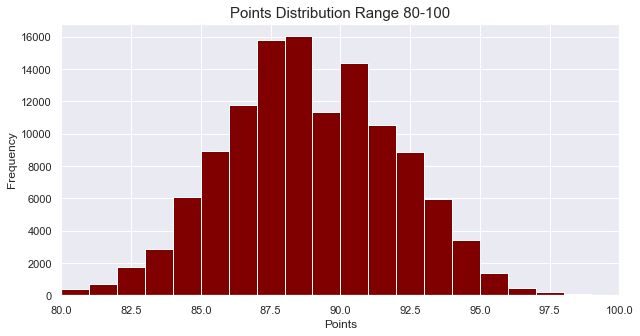

In [26]:
# Plotting the distribution of points
plt.figure(figsize=(10,5))
bin_edges = np.arange (80, df1['points'].max()+1, 1)
plt.hist(data = df1, x = 'points', bins = bin_edges, color = 'maroon')
plt.xlim(80,100)
plt.xlabel('Points')
plt.ylabel('Frequency');
plt.title('Points Distribution Range 80-100', fontsize = 15);

The plot shows a rough normal distribution between the rage 80-100.

In [27]:
# Extracting highest 5 wine producing countries
country_top = df1.country.value_counts()[:5]
country_top

US          54265
France      17776
Italy       16914
Spain        6573
Portugal     4875
Name: country, dtype: int64

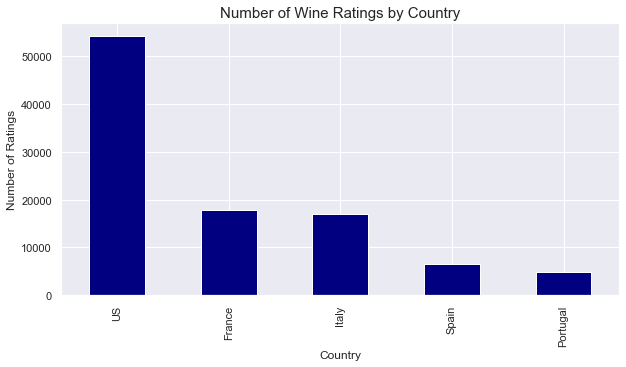

In [28]:
# Top 5 wine producing countries 
plt.figure(figsize=(10,5))
country_top.plot(kind='bar', color = 'navy')
plt.title('Number of Wine Ratings by Country', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Number of Ratings');

It is apparent that the top 5 wine producing countries are: **USA**, **France**, **Italy**, **Spain**, **Portugal**

In [29]:
# Grouping countries by their average points
df_group = df1.groupby('country').agg('mean')

In [30]:
# A dataframe of countries with the 5 most points 
df_top_points = df_group.sort_values(by='points', ascending=False)[:5]
df_top_points

,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598


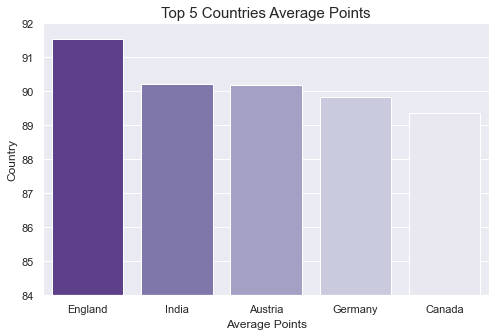

In [31]:
# Plotting the Top 5 wine producing countries
plt.figure(figsize=(8,5))
plt.ylim(84, 92)
sns.barplot(x=df_top_points.index, y=df_top_points['points'], palette='Purples_r')
plt.title('Top 5 Countries Average Points', fontsize = 15)
plt.xlabel('Average Points')
plt.ylabel('Country');

This analysis indicates that **England** owns the higest average points among all wine producers. However, the validity of this deduction should be assessed based on the number of datasets. Lower datasets with high rating could lead to this assumption. 

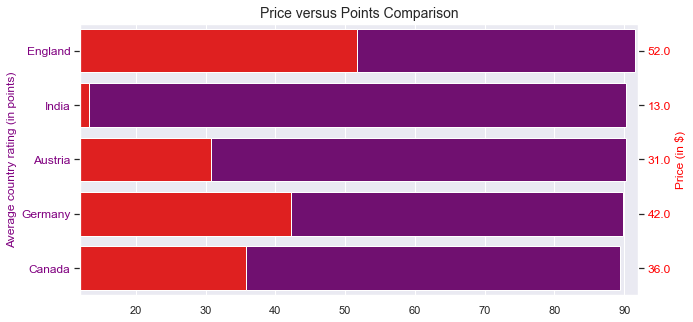

In [32]:
# Plotting te comparison between Points and Prices on the Top Countries
data=[df_top_points['points'], df_top_points['price']]
headers = ["points", "price"]
df_data=pd.concat(data, axis=1, keys=headers)

fig, ax1 = plt.subplots(figsize = (10,5))
 
sns.barplot(x=df_data['points'],y=df_data.index, color='purple')
ax1.tick_params(axis='y', labelcolor='purple', labelsize = 12)
ax1.set_ylabel('Average country rating (in points)', color='purple', fontsize=12) #mention unit for rating

ax2 = ax1.twinx()
plt.xlim(12, 92)

sns.barplot(x=df_data['price'], y=df_data.index, color='red')
ax2.tick_params(axis='y', labelcolor='red', labelsize = 12) 
ax2.set_yticklabels(df_top_points['price'].round()) #relabel right axis with price values
ax1.set_xlabel("") #remove x-label because this axis applies to both categories
ax2.set_ylabel('Price (in $)', color='red', fontsize=12)#mention unit for price
ax2.set_title("Price versus Points Comparison", fontsize=14)
plt.show()

It can be seen that **India** has one of the highest average point with the lowst price. In comparison **England** has the highest average point with almost triple times more in price as the most expensive wine among all. **Astria** on the other hand is double as costy as **India**, yet almost similar in average points. We need to further investigae to underatnd if **India** gains that much attention purely as the result of its price or quality. **England** in terms of Price aversus Points is in a reasonable position, as it holds the highest rating and highest price.

In [33]:
# Descriptive info of the Dataframe
df1.points.describe()

count    120915.000000
mean         88.421726
std           3.044954
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [34]:
# Countries which scored above 96 points
high_scorers = df1[df1['points']>=96]
high_scorers

,country,description,points,price,province,region_1,title,variety,winery,year
345,Australia,This wine contains some material over 100 year...,100,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards,NaN
346,Australia,"This deep brown wine smells like a damp, mossy...",98,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards,NaN
347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",97,775.0,Rheingau,NaN,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil,2014
348,Australia,Deep mahogany. Dried fig and black tea on the ...,97,100.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Grand Muscat (R...,Muscat,Chambers Rosewood Vineyards,NaN
349,Australia,"RunRig is always complex, and the 2012 doesn't...",97,225.0,South Australia,Barossa,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck,2012
...,...,...,...,...,...,...,...,...,...,...
128267,US,An extraordinary wine. It's the essence of Rus...,97,85.0,California,Russian River Valley,Semper 2007 Gold Ridge Pinot Noir (Russian Riv...,Pinot Noir,Semper,2007
128268,US,A monumental Cabernet that succeeds on every l...,97,50.0,California,Oak Knoll District,Trefethen 2005 Estate Cabernet Sauvignon (Oak ...,Cabernet Sauvignon,Trefethen,2005
128269,US,"Massive, dramatic, beautiful, intense, but you...",97,100.0,California,Napa Valley,Hestan 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Hestan,2006
128270,US,"Monumentally detailed, this 100% Cabernet Sauv...",97,65.0,California,St. Helena,Redmon 2006 Cabernet Sauvignon (St. Helena),Cabernet Sauvignon,Redmon,2006


In [35]:
# Unique counts of countries scored above 96 points
high_scorers.country.value_counts()

US           351
France       185
Italy        129
Portugal      35
Austria       29
Germany       25
Spain         22
Australia     22
Hungary        4
Argentina      3
Name: country, dtype: int64

In [36]:
# Unique counts of number of wines for each country
df1.country.value_counts()

US                        54265
France                    17776
Italy                     16914
Spain                      6573
Portugal                   4875
Chile                      4415
Argentina                  3756
Austria                    2799
Australia                  2294
Germany                    2120
New Zealand                1378
South Africa               1293
Israel                      489
Greece                      461
Canada                      254
Hungary                     145
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
Mexico                       70
England                      69
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

The above analysis can demonstrate that, even though **England** has the highest mean score but countries such as **USA**, **France** and **Italy** have the highest number of reviews in comparison. This inerefnce could be as the result of more variaty of wines with the latter counries. Therefore, it may not be the best comparison for a fair analysis. 

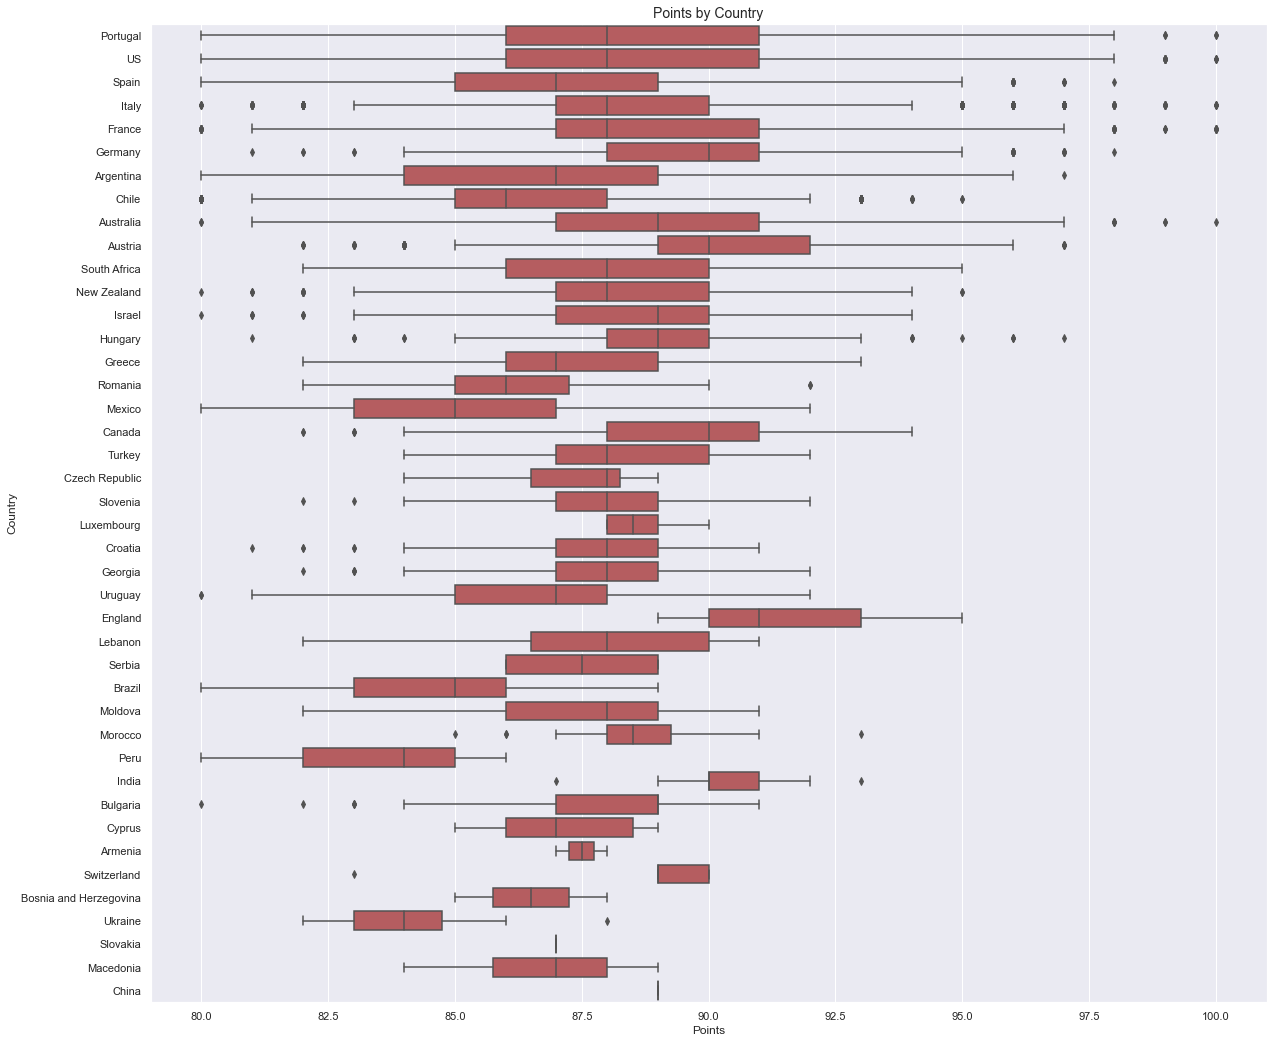

In [57]:
# Plotting a Boxplot of the Dataframe
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[3]
sns.boxplot(data = df1, x = 'points', y = 'country', color = base_color)
plt.title('Points by Country', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Country');

As shown in the above Boxplot, despite **England** having the highest points on average, wines from **Portugal**, the **USA**, **Italy**, **France**, and **Australia** received a total **100** score. This could be because these countries have much wider range of wines. 

In [58]:
# Unique count of provinces
wine_prov = df1.province.value_counts()[:10]

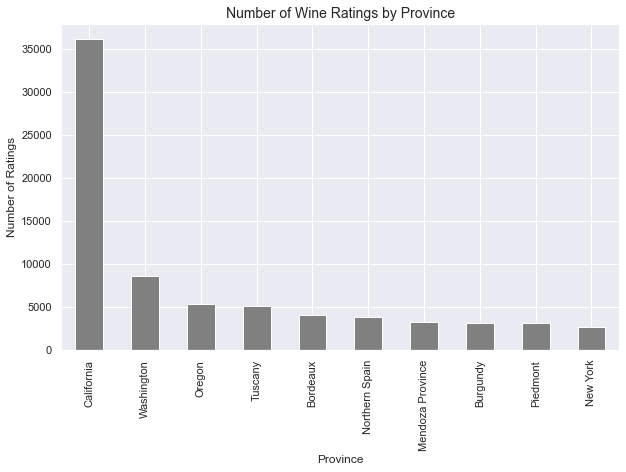

In [59]:
# Plotting the ratings by province
plt.figure(figsize=(10,6))
wine_prov.plot(kind='bar', color = 'gray')
plt.title('Number of Wine Ratings by Province', fontsize = 14)
plt.xlabel('Province')
plt.ylabel('Number of Ratings');

As the most number of reviews are from **USA**, it is expected that **california** stands for the most number of ratings. 

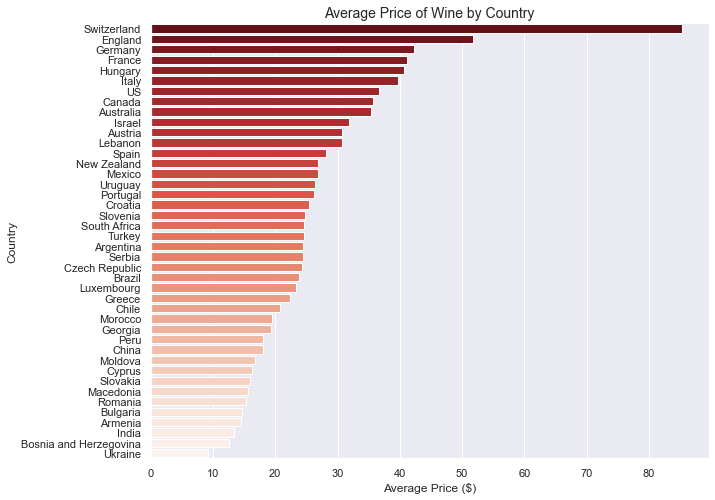

In [62]:
# Plotting the mean price of wine per country
df4 = df1.groupby('country').agg('mean')
df5 = df4.sort_values(by='price', ascending=False)
y_val = df5.index.to_series()
x_val = df5['price']

plt.figure(figsize=(10,8))
sns.barplot(x=x_val, y=y_val, palette= 'Reds_r')
plt.title('Average Price of Wine by Country', fontsize = 14)
plt.xlabel('Average Price ($)')
plt.ylabel('Country');

The clear indications are that **Switzerland** has the highest average price of above **85\$** and that is just under **10\$** for **Ukraine** as the lowest among all.

### 2. Is Price Related to Quality of Wine?

In [73]:
# Exploring descriptive statistics
df1['price'].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

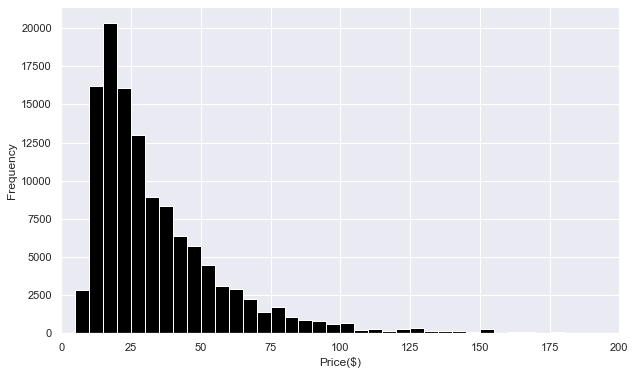

In [64]:
# Plotting the price distribution
plt.figure(figsize=(10,6))
bin_edges = np.arange (0, df1['price'].max()+5, 5)
plt.hist(data = df1, x = 'price', bins = bin_edges, color = 'black')

# Cutting the x-axis at 200
plt.xlim(0,200) 
plt.xlabel('Price($)')
plt.ylabel('Frequency');

The plot shows a positive skew distribution to the right. Using logarithmic transformation may help a better distribution. 

In [74]:
# A base-10 logarithmic trasformtion of data
np.log10(df1['price'].describe())

count    5.082480
mean     1.548620
std      1.613114
min      0.602060
25%      1.230449
50%      1.397940
75%      1.623249
max      3.518514
Name: price, dtype: float64

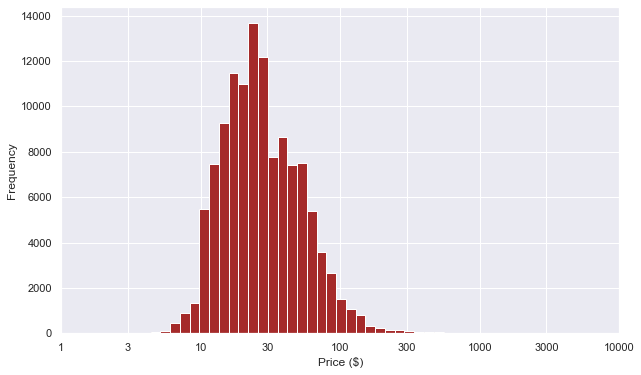

In [95]:
# Plotting price distribution on a log scale
plt.figure(figsize=(10,6))
bin_edges = 10 ** np.arange(0.5, 3.5 + 0.07, 0.07)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data = df1, x = 'price', bins=bin_edges, color = 'brown')
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Price ($)')
plt.ylabel('Frequency');

The above graph illustrates an approximatly long-normal distribution. There is a considrable peak around **10\$** and two peaks around **20\$** and **50\

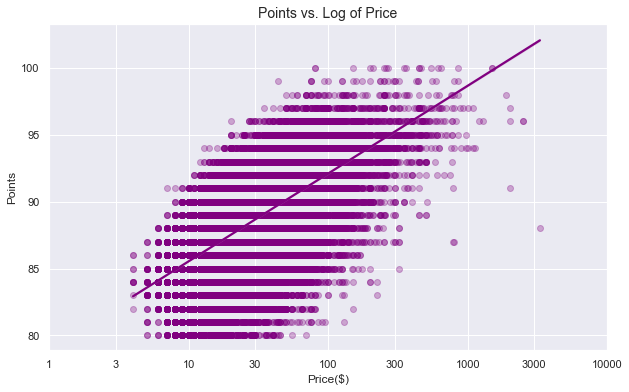

In [45]:
# plotting a scatter plot of relationship between points and price with a log transformation on the price axis
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='points', data=df1, color = 'purple', logx = True, scatter_kws={'alpha':0.3})
plt.title("Points vs. Log of Price", fontsize=14)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000, 10000], [1, 3, 10, 30, 100, 300, 1000, 3000, 10000])
plt.xlabel("Price($)")
plt.ylabel("Points");

In [46]:
 # the lowest priced wine
df1.loc[df1['price'].idxmin()]

country                                                    Spain
description    Berry and cherry aromas are surprisingly sturd...
points                                                        85
price                                                        4.0
province                                           Central Spain
region_1                           Vino de la Tierra de Castilla
title          Felix Solis 2013 Flirty Bird Syrah (Vino de la...
variety                                                    Syrah
winery                                               Felix Solis
year                                                        2013
Name: 1987, dtype: object

In [47]:
# the highest priced wine
df1.loc[df1['price'].idxmax()]

country                                                   France
description    This ripe wine shows plenty of blackberry frui...
points                                                        88
price                                                     3300.0
province                                                Bordeaux
region_1                                                   Médoc
title                       Château les Ormes Sorbet 2013  Médoc
variety                                 Bordeaux-style Red Blend
winery                                  Château les Ormes Sorbet
year                                                        2013
Name: 80290, dtype: object

In [48]:
pd.options.display.max_colwidth = 500
df1[df1['price']==df['price'].min()][:1]

,country,description,points,price,province,region_1,title,variety,winery,year
1987,Spain,"Berry and cherry aromas are surprisingly sturdy and clean. Freshness is maintained on the palate, which is honest enough to offer modest tannic bite. Lightly spiced plum and raspberry flavors change little on an easy finish.",85,4.0,Central Spain,Vino de la Tierra de Castilla,Felix Solis 2013 Flirty Bird Syrah (Vino de la Tierra de Castilla),Syrah,Felix Solis,2013


In [49]:
df1[df1['price']==df['price'].max()]

,country,description,points,price,province,region_1,title,variety,winery,year
80290,France,"This ripe wine shows plenty of blackberry fruits balanced well with some dry tannins. It is fresh, juicy with plenty of acidity, For a light vintage, it's perfumed, full of fresh flavors and will be ready to drink from 2017.",88,3300.0,Bordeaux,Médoc,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,2013


### 3. Are certain varieties of Wine of Better Quality on Average?

Let's now compare the top 20 wine types and see how they score.

In [50]:
# top 20 wines by count
df1.variety.value_counts()[:20]

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
White Blend                  2167
Sparkling Blend              2027
Tempranillo                  1788
Rhône-style Red Blend        1404
Pinot Gris                   1388
Name: variety, dtype: int64

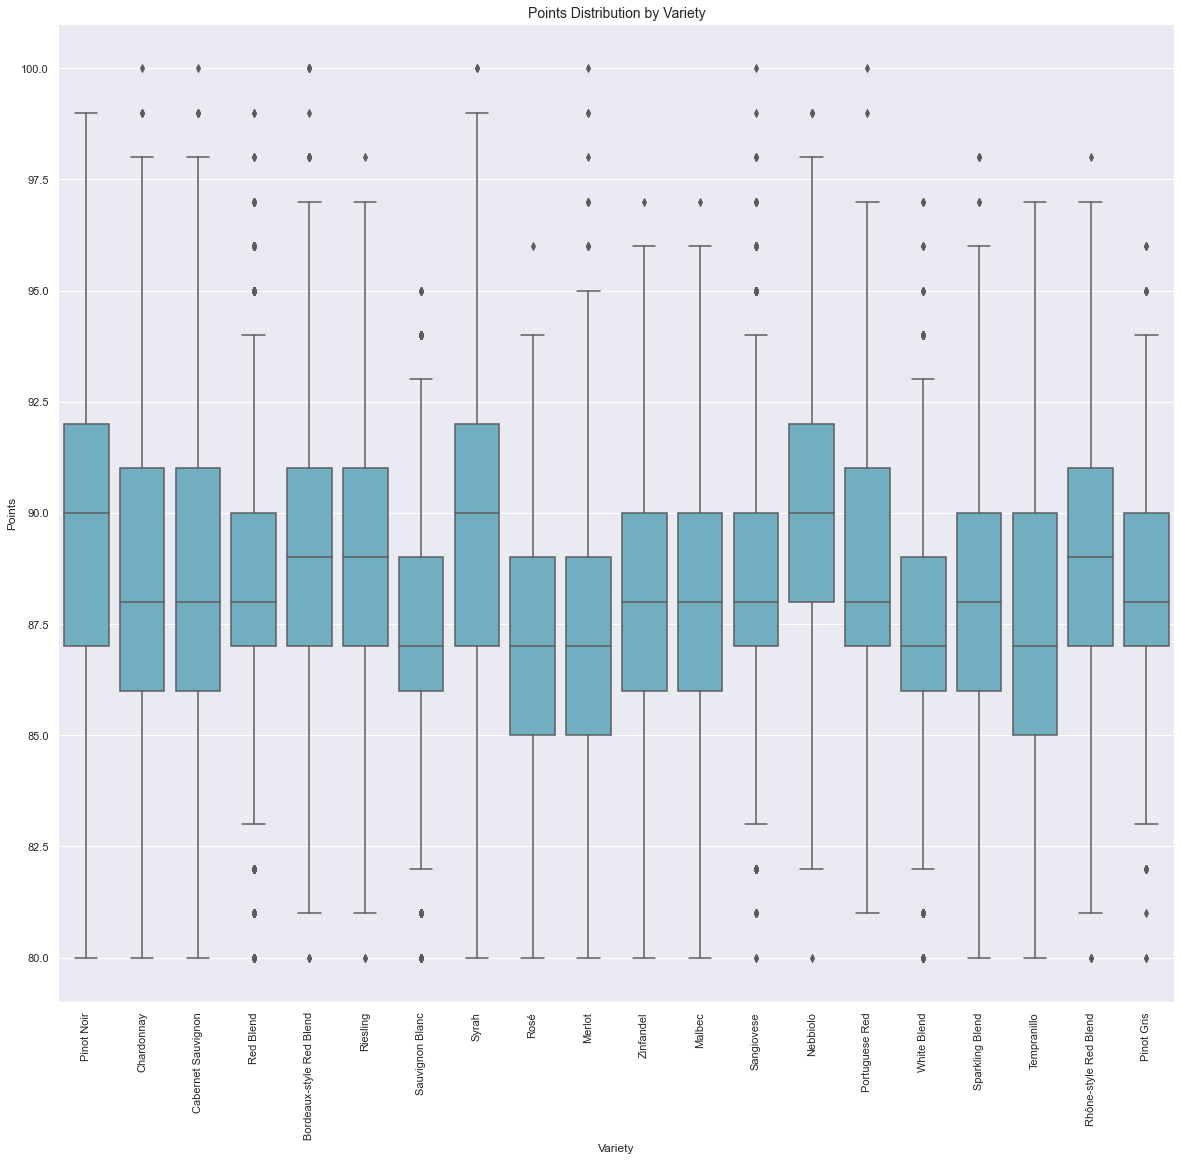

In [51]:
# boxplot of the top 20 most frequent wines in dataset by points scored
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[9]
sns.boxplot(data = df1, x = 'variety', y = 'points', color = base_color, order = df1.variety.value_counts().iloc[:20].index)
plt.title('Points Distribution by Variety', fontsize = 14)
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=90);

When plotting the top 20 most popular wines in the dataset we can see that pinor noir tends to perform the best with the highest average score.